In [0]:
import warnings
warnings.filterwarnings("ignore")

# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation & images
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Hide system warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [89]:
!wget --no-check-certificate https://raw.githubusercontent.com/ischender/ML_workshop/master/data/titanic/test.csv -O /tmp/test.csv 
!wget --no-check-certificate https://raw.githubusercontent.com/ischender/ML_workshop/master/data/titanic/train.csv -O /tmp/train.csv


--2019-11-07 10:36:30--  https://raw.githubusercontent.com/ischender/ML_workshop/master/data/titanic/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28210 (28K) [text/plain]
Saving to: ‘/tmp/test.csv’

/tmp/test.csv       100%[===================>]  27.55K  --.-KB/s    in 0.004s  

2019-11-07 10:36:31 (7.14 MB/s) - ‘/tmp/test.csv’ saved [28210/28210]

--2019-11-07 10:36:33--  https://raw.githubusercontent.com/ischender/ML_workshop/master/data/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]

In [0]:
train = pd.read_csv('/tmp/train.csv')
test = pd.read_csv('/tmp/test.csv')

In [91]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values

passId = test['PassengerId']

data = pd.concat((train, test), sort=True)

print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


- PassengerId: The unique identifier in this Data file
- Survived: The fate of each passenger (target)
- Pclass: The ticket class
- Name: The passenger name
- Sex: The passenger sex
- Age: The passenger age in years
- Sibsp: The number of siblings/spouses also travelling
- Parch: The number of parents/children also travelling
- Ticket: The passenger ticket number
- Fare: The passenger fare
- Cabin: The passenger cabin number
- Embarked: The passenger's port of Embarkation

In [93]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [94]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [95]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [96]:
# Initiate correlation matrix
corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


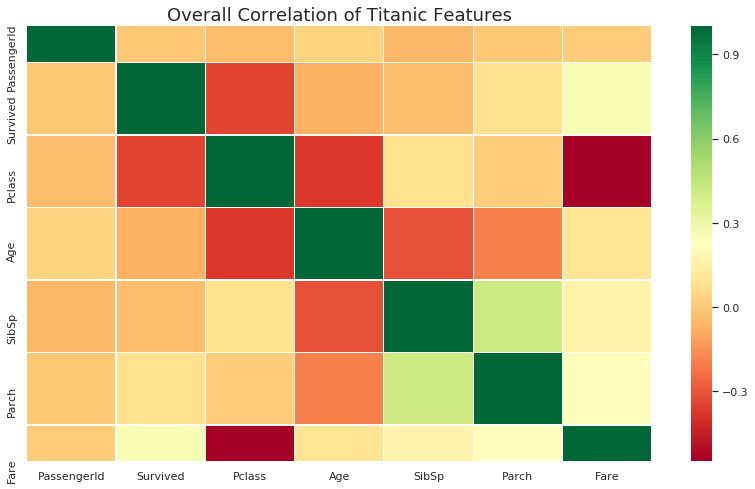

In [97]:
# Set-up figure
plt.figure(figsize=(14, 8))
# Title
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [98]:
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

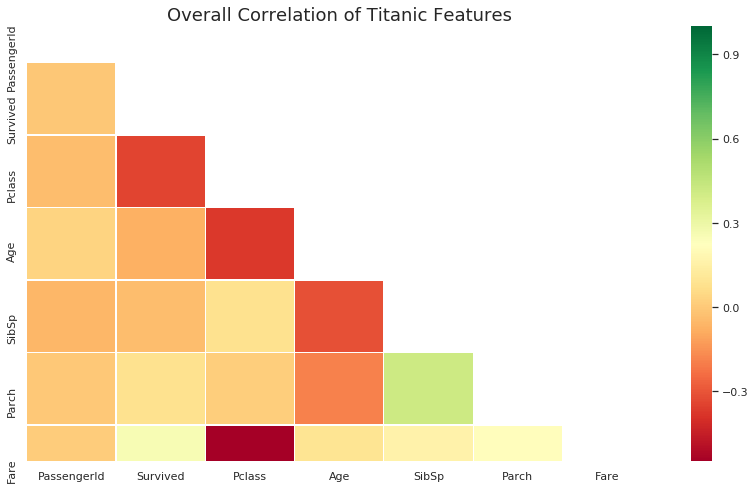

In [99]:

# Set-up figure
plt.figure(figsize=(14, 8))
# Title
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

0    549
1    342
Name: Survived, dtype: int64

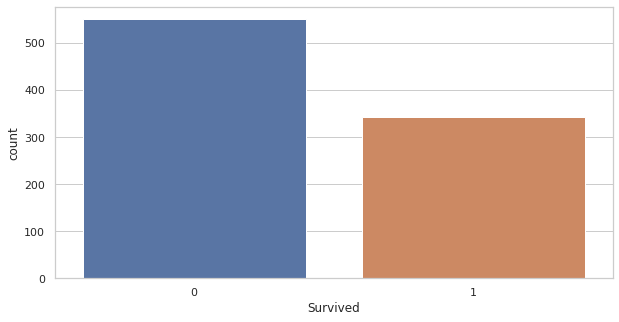

In [100]:
# Plot for survived
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = train)
train['Survived'].value_counts()

Text(0.5, 1.0, 'Percentage Survived by Ticket Class')

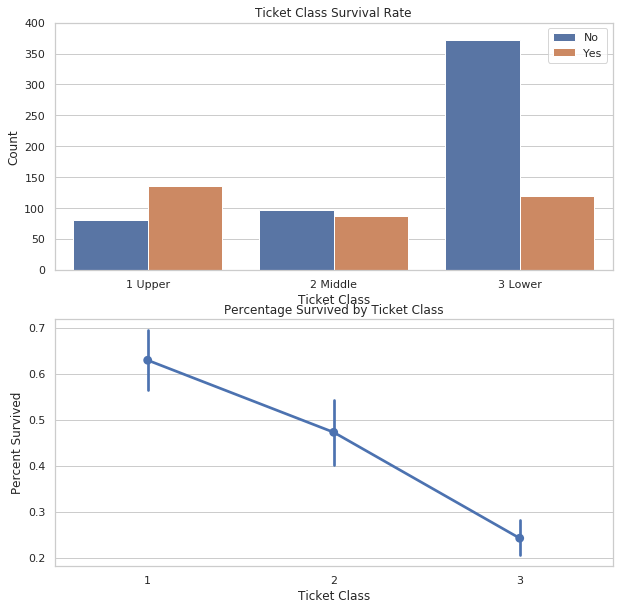

In [101]:
# Bar chart of each Pclass type
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
ax1.set_title('Ticket Class Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass', y='Survived', data=train)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Ticket Class')

Text(0.5, 1.0, 'Percentage Survived by Gender')

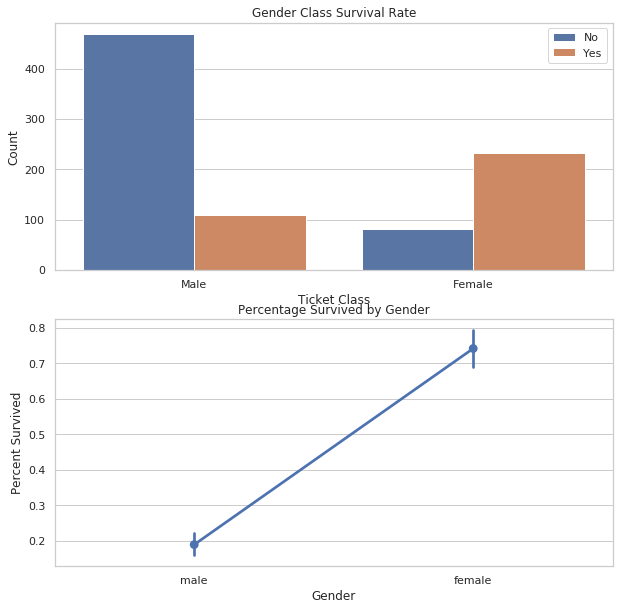

In [102]:
# Bar chart of each Pclass type
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Sex', hue = 'Survived', data = train)
ax1.set_title('Gender Class Survival Rate')
ax1.set_xticklabels(['Male','Female'])
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Sex', y='Survived', data=train)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Gender')

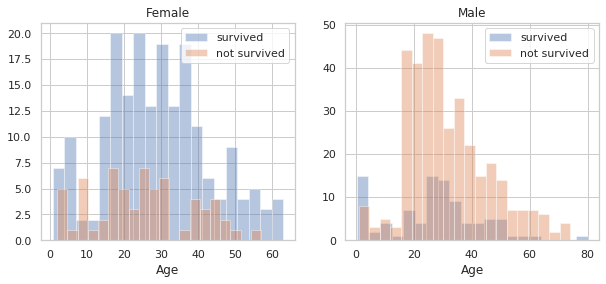

In [103]:
# Bar chart of age mapped against sex. For now, missing values have been dropped and will be dealt with later
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

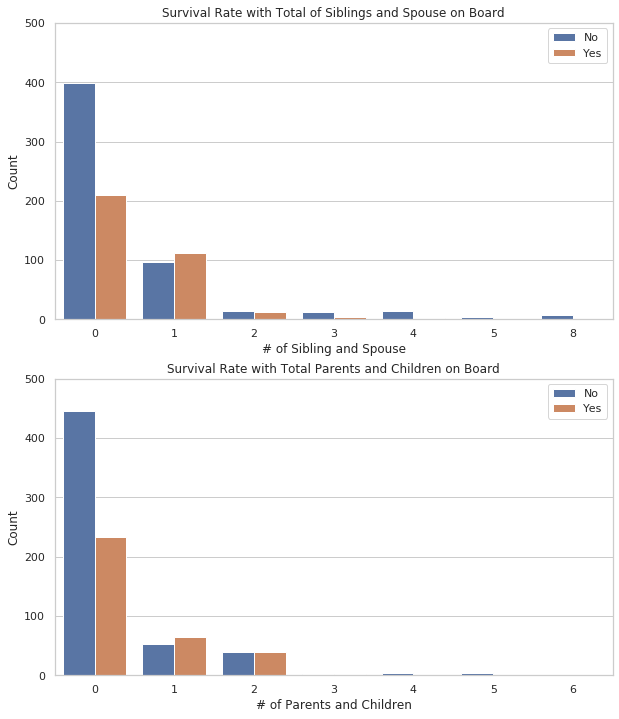

In [104]:
# Plotting survival rate vs Siblings or Spouse on board
fig = plt.figure(figsize = (10,12))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
ax1.set_title('Survival Rate with Total of Siblings and Spouse on Board')
ax1.set_ylim(0,500)
ax1.set_xlabel('# of Sibling and Spouse')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'],loc = 1)

# Plotting survival rate vs Parents or Children on board
ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(x = 'Parch', hue = 'Survived', data = train)
ax2.set_title('Survival Rate with Total Parents and Children on Board')
ax2.set_ylim(0,500)
ax2.set_xlabel('# of Parents and Children')
ax2.set_ylabel('Count')
ax2.legend(['No','Yes'],loc = 1)

In [105]:
# Extract last name
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ",")[0])

# Fill in missing Fare value by overall Fare mean
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Setting coin flip (e.g. random chance of surviving)
default_survival_chance = 0.5
data['Family_Survival'] = default_survival_chance

# Grouping data by last name and fare - looking for families
for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    # If not equal to 1, a family is found 
    # Then work out survival chance depending on whether or not that family member survived
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin == 0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

# Print the headline
print("Number of passengers with family survival information:", 
      data.loc[data['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [106]:
# If not equal to 1, a group member is found
# Then work out survival chance depending on whether or not that group member survived
for _, grp_df in data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

# Print the headline
print("Number of passenger with family/group survival information: " 
      +str(data[data['Family_Survival']!=0.5].shape[0]))

Number of passenger with family/group survival information: 546


In [107]:
# Reset index for remaining feature engineering steps
data = data.reset_index(drop=True)
data = data.drop('Survived', axis=1)
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Last_Name,Family_Survival
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,A.5. 3236,Spector,0.5
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,PC 17758,Oliva y Ocana,1.0
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,SOTON/O.Q. 3101262,Saether,0.5
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,359309,Ware,0.5
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,2668,Peter,1.0


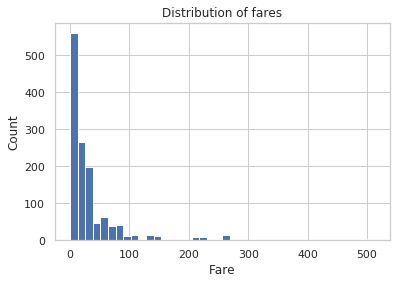

In [108]:
# Visualising fare data
plt.hist(data['Fare'], bins=40)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of fares')
plt.show()

In [0]:
# Turning fare into 4 bins due to heavy skew in data
data['Fare'] = pd.qcut(data['Fare'], 4)

# I will now use Label Encoder to convert the bin ranges into numbers
lbl = LabelEncoder()
data['Fare'] = lbl.fit_transform(data['Fare'])

Text(0.5, 1.0, 'Fare Bins')

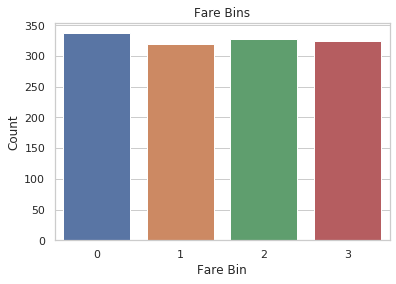

In [110]:
# Visualise new look fare variable
sns.countplot(data['Fare'])
plt.xlabel('Fare Bin')
plt.ylabel('Count')
plt.title('Fare Bins')

In [111]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [113]:
titles_data = sorted(set([x for x in data['Name'].map(lambda x: get_title(x))]))
print(len(titles_data), ':', titles_data)

18 : ['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [0]:
# New function to classify each title into 1 of 4 overarching titles
def set_title(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [0]:
# Applying the get_title function to create the new 'Title' feature
data['Title'] = data['Name'].map(lambda x: get_title(x))
data['Title'] = data.apply(set_title, axis=1)

In [116]:
# Printing values of the title column (checking function worked!)
print(data['Title'].value_counts())

Mr        782
Miss      264
Mrs       202
Master     61
Name: Title, dtype: int64


In [117]:
# Returning NaN within Age across Train & Test set
print('Total missing age data: ', pd.isnull(data['Age']).sum())

Total missing age data:  263


In [118]:
# Check which statistic to use in imputation
print(data['Age'].describe(exclude='NaN'))

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


In [0]:
# Imputing Age within the train & test set with the Median, grouped by Pclass and title
data['Age'] = data.groupby('Title')['Age'].apply(lambda x: x.fillna(x.median()))

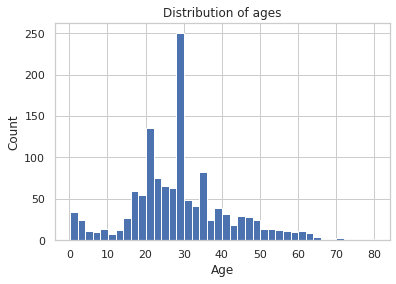

In [120]:
# Visualise new look age variable
plt.hist(data['Age'], bins=40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of ages')
plt.show()

In [0]:
# Turning data into 4 bins due to heavy skew in data
data['Age'] = pd.qcut(data['Age'], 4)

# Transforming bins to numbers
lbl = LabelEncoder()
data['Age'] = lbl.fit_transform(data['Age'])

Text(0.5, 1.0, 'Age Bins')

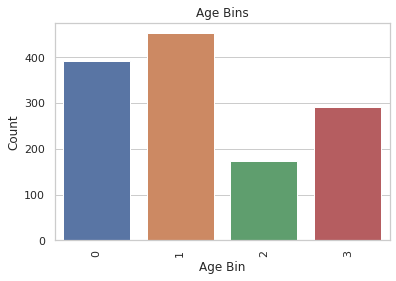

In [122]:
# Visualise new look fare variable
plt.xticks(rotation='90')
sns.countplot(data['Age'])
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.title('Age Bins')

In [0]:
data['Title'] = data['Title'].replace(['Mr', 'Miss', 'Mrs', 'Master'], [0, 1, 2, 3])

In [0]:
data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])

In [125]:
data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [0]:
# Filling in missing embarked values with the mode (S)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Converting to numeric values
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

In [127]:
# Inspecting head of Cabin column
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Labelling all NaN values as 'Unknown'
data['Cabin'].fillna('Unknown',inplace=True)

In [0]:
# Extracting the first value in the each row of Cabin
data['Cabin'] = data['Cabin'].map(lambda x: x[0])

In [130]:
data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [131]:
data['Cabin'] = data['Cabin'].replace(data['Cabin'].unique(), list(range(len(data['Cabin'].unique()))))
data['Cabin']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Cabin, Length: 1309, dtype: int64

In [132]:
data['Cabin'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
# Creating two features of relatives and not alone
data['Family Size'] = data['SibSp'] + data['Parch']

In [134]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Last_Name,Family_Survival,Title,Family Size
0,0,0,0,0,"Braund, Mr. Owen Harris",0,1,3,0,1,A/5 21171,Braund,0.5,0,1
1,3,1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,PC 17599,Cumings,0.5,2,1
2,1,0,0,1,"Heikkinen, Miss. Laina",0,3,3,1,0,STON/O2. 3101282,Heikkinen,0.5,1,0
3,2,1,0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,113803,Futrelle,0.0,2,1
4,2,0,0,1,"Allen, Mr. William Henry",0,5,3,0,0,373450,Allen,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,0,1,"Spector, Mr. Woolf",0,1305,3,0,0,A.5. 3236,Spector,0.5,0,0
1305,3,1,1,3,"Oliva y Ocana, Dona. Fermina",0,1306,1,1,0,PC 17758,Oliva y Ocana,1.0,2,0
1306,3,0,0,0,"Saether, Mr. Simon Sivertsen",0,1307,3,0,0,SOTON/O.Q. 3101262,Saether,0.5,0,0
1307,1,0,0,1,"Ware, Mr. Frederick",0,1308,3,0,0,359309,Ware,0.5,0,0


In [0]:
data = data.drop(['Name', 'Parch', 'SibSp', 'Ticket', 'Last_Name', 'PassengerId'], axis = 1)

In [0]:
# Return to train/test sets
train = data[:ntrain]
test = data[ntrain:]

In [0]:
# Set up feature and target variables in train set, and remove Passenger ID from test set
X_test = test
X_train = train

# Scaling data to support modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# let's try ALL of the models, and find the best ones

In [0]:
# Initiate 11 classifier models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [140]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,SVC,0.856339
1,Gaussian Process,0.854091
2,Gradient Boosting,0.852980
3,XGBoost,0.851869
4,Logistic Regression,0.848486
5,K Nearest Neighbour,0.842981
6,AdaBoost,0.840683
7,Bagging Classifier,0.835078
8,Random Forest,0.829473
9,Extra Trees,0.821620


(0.8, 0.86)

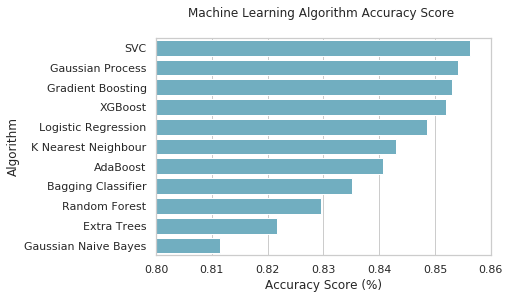

In [141]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.86)

In [0]:
# Function for new graph
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, height=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Set a different title for each axes
        ax.set(title=title)
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [0]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

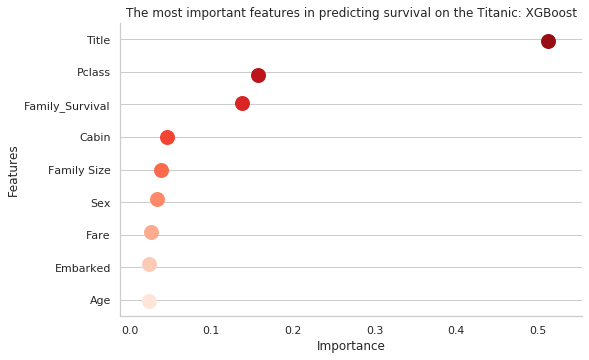

In [144]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: XGBoost']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# Building feature importance into a DataFrame
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

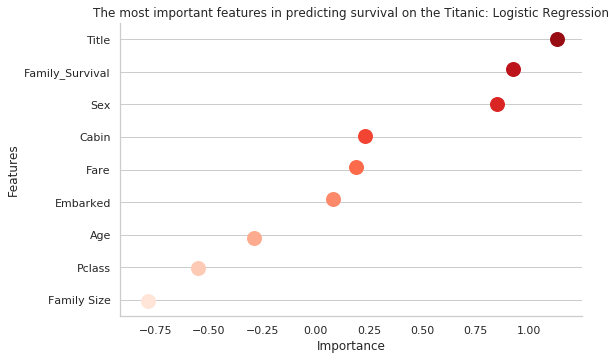

In [146]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [147]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,Title,0.518296,0.511969,0.268868,0.175562,0.12,0.318939
1,Family_Survival,0.209142,0.137701,0.137947,0.148065,0.12,0.150571
2,Pclass,0.122455,0.157887,0.080936,0.117657,0.10,0.115787
3,Family Size,0.036417,0.038068,0.099174,0.088101,0.20,0.092352
4,Cabin,0.053341,0.046373,0.079640,0.057014,0.22,0.091273
5,Sex,0.000816,0.033262,0.141255,0.255096,0.02,0.090086
6,Age,0.021789,0.023552,0.080203,0.062258,0.10,0.057560
7,Fare,0.029831,0.026772,0.064510,0.050022,0.04,0.042227
8,Embarked,0.007914,0.024417,0.047468,0.046225,0.08,0.041205


In [0]:
# Building feature importance into a DataFrame
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

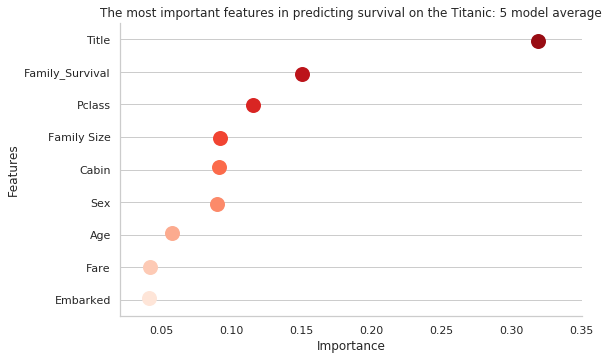

In [149]:
# Creating graph title
titles = ['The most important features in predicting survival on the Titanic: 5 model average']
# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# Drop redundant features
train = train.drop(['Embarked', 'Cabin'], axis=1)
test = test.drop(['Embarked', 'Cabin'], axis=1)

# Re-build model variables
X_train = train
X_test = test

# Transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Initiate models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [152]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,Gaussian Process,0.854091,0.857475
1,SVC,0.856339,0.857437
2,XGBoost,0.851869,0.856326
3,Gradient Boosting,0.852980,0.856313
4,K Nearest Neighbour,0.842981,0.849723
5,Logistic Regression,0.848486,0.848524
6,Bagging Classifier,0.835078,0.841731
7,Random Forest,0.829473,0.840633
8,Extra Trees,0.821620,0.837325
9,AdaBoost,0.840683,0.837300


(0.8, 0.86)

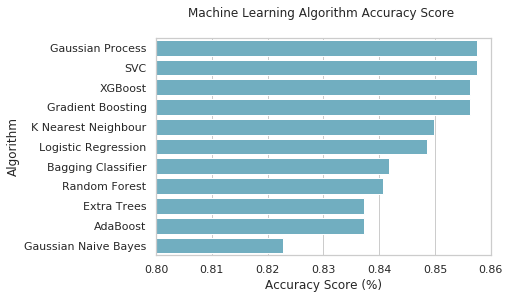

In [153]:
# Plot results
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.86)

In [154]:
# Parameter's to search
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.856341189674523
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.7s finished


In [155]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.5min finished


0.856341189674523
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.0005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [156]:
# Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8507295173961841
LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [0]:
# Initiate tuned models
ran = RandomForestClassifier(n_estimators=25,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=5, 
                           weights='uniform')

log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=2, 
                           min_samples_split=8,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=50,
                         random_state=1)

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

# Lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

# Fit & cross-validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [158]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,Gaussian Process,0.854091,0.857475,0.857475
1,Extra Trees,0.821620,0.837325,0.857462
2,SVC,0.856339,0.857437,0.857437
3,XGBoost,0.851869,0.856326,0.856301
4,Gradient Boosting,0.852980,0.856313,0.856301
5,Random Forest,0.829473,0.840633,0.852930
6,K Nearest Neighbour,0.842981,0.849723,0.849673
7,AdaBoost,0.840683,0.837300,0.849584
8,Logistic Regression,0.848486,0.848524,0.848524
9,Bagging Classifier,0.835078,0.841731,0.841731


(0.82, 0.86)

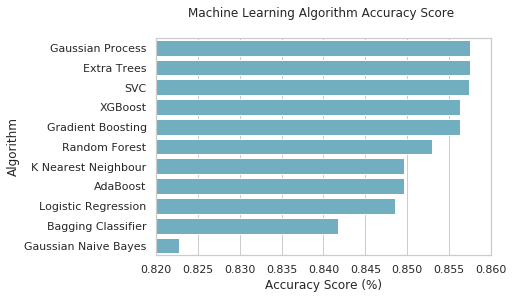

In [159]:
# Plot results
sns.barplot(x='Score with tuned parameters', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.82, 0.86)